## 6.4 Machine Learning Part 1

### This script contains the following:
    #### 1. Importing libraries and data
    #### 2. Data cleaning
    #### 3. Data prep for regression analysis
    #### 4. Regression analysis
    #### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to \"call\" them specifically.\n",
%matplotlib inline

In [3]:
#import data file
df=pd.read_csv(r'C:\\Users\\chloe\\Documents\\05.2023 project\\02 Data\\Prepared data\\WorldAQI_Clean.csv', index_col = False)

### 2. Data cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'Country', 'City', 'AQI Value', 'AQI Category',
       'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [5]:
df.head(20)

,Unnamed: 0,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
6,6,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,26.8941,-82.0513
7,7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate,51.0761,4.2803
8,8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate,44.0500,43.0667
9,9,China,Qinzhou,68,Moderate,2,Good,68,Moderate,1,Good,58,Moderate,21.9500,108.6167


In [6]:
df.shape

(16393, 15)

In [7]:
# Rename the columns in the same way as in Exercise 6.2.
df.rename(columns = {'lat' : 'Latitude', 'lng': 'Longitude'}, inplace = True)

##### Missing values

In [8]:
# Check for missing values
df.isnull().sum()
# No missing values to handle

Unnamed: 0            0
Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
Latitude              0
Longitude             0
dtype: int64

In [11]:
#Check for duplicates
dups=df.duplicated
dups()
#No duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
16388    False
16389    False
16390    False
16391    False
16392    False
Length: 16393, dtype: bool

##### Extreme values checks

C:\Users\Chloe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI Value', ylabel='Density'>

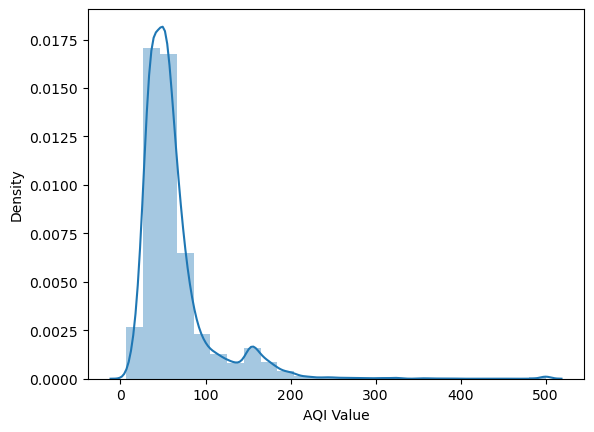

In [12]:
#Checking outliers for AQI Value
sns.distplot(df['AQI Value'], bins=25) 
# There are outliers in the high values but too many to drop, i.e they're not outliers. See 6.3

In [15]:
df['AQI Value'].median() # Check the median

52.0

In [16]:
df['AQI Value'].min() # Check the min

7

In [17]:
df['AQI Value'].max() # Check the max

500

C:\Users\Chloe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO AQI Value', ylabel='Density'>

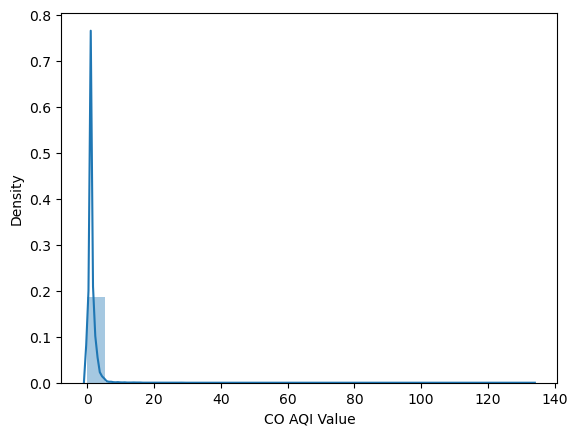

In [27]:
sns.distplot(df['CO AQI Value'], bins=25) # Shows extreme values for CO AQI Value

In [22]:
df['CO AQI Value'].median() # Check the median

1.0

In [23]:
df['CO AQI Value'].min() # Check the min

0

In [24]:
df['CO AQI Value'].max() # Check the max

133

C:\Users\Chloe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NO2 AQI Value', ylabel='Density'>

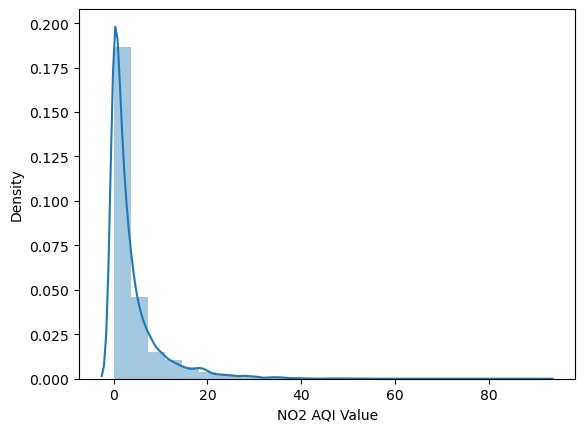

In [25]:
#Checking outliers for NO2 AQI Value
sns.distplot(df['NO2 AQI Value'], bins=25) 

In [28]:
df['NO2 AQI Value'].median() # Check the median

2.0

In [29]:
df['NO2 AQI Value'].min() # Check the min

0

In [30]:
df['NO2 AQI Value'].max() # Check the max

91

C:\Users\Chloe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5 AQI Value', ylabel='Density'>

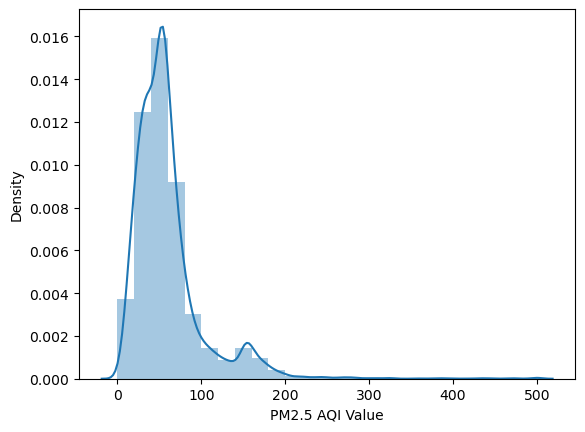

In [31]:
#Checking outliers for PM2.5 AQI Value Value
sns.distplot(df['PM2.5 AQI Value'], bins=25) 

In [33]:
df['PM2.5 AQI Value'].median() # Check the median

52.0

In [32]:
df['PM2.5 AQI Value'].min() # Check the min

0

In [34]:
df['PM2.5 AQI Value'].max() # Check the max

500

### 3. Data prep for regression analysis

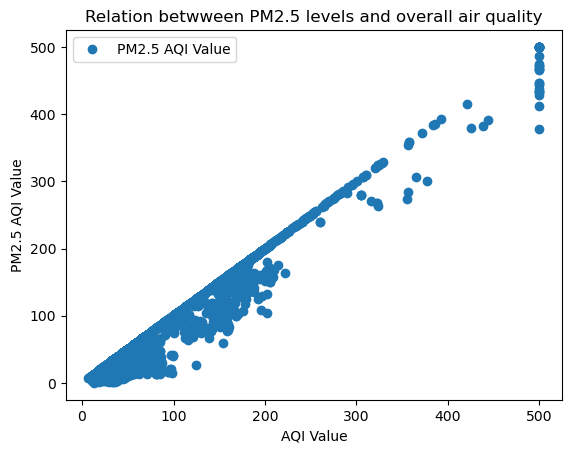

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'AQI Value', y='PM2.5 AQI Value',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Relation betwween PM2.5 levels and overall air quality')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

#Hypothesis 1: Higher levels of PM2.5 have a very strong negative impact on the overall air quality level (i.e stromger than all other particulates)

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['AQI Value'].values.reshape(-1,1)
y = df['PM2.5 AQI Value'].values.reshape(-1,1)

In [37]:
X

array([[51],
       [41],
       [41],
       ...,
       [71],
       [50],
       [71]], dtype=int64)

In [38]:
y

array([[51],
       [41],
       [41],
       ...,
       [71],
       [50],
       [71]], dtype=int64)

In [39]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### 4. Regression analysis

In [40]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [41]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

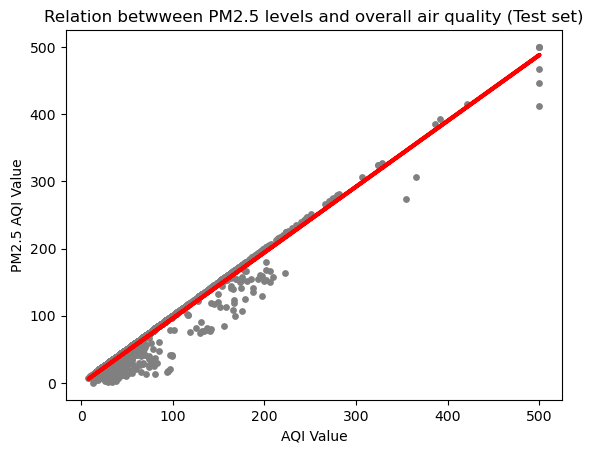

In [44]:
# Create a plot that shows the regression line from the model on the test set.\n",
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relation betwween PM2.5 levels and overall air quality (Test set)')
plot_test.xlabel('AQI Value')
plot_test.ylabel('PM2.5 AQI Value')
plot_test.show()

#Interpretation of how well the line appears to fit the data: There is a very strong correlation between the regression line and the data, suggesting a very good fit. But there are some points to be aware of: Some cities with a lower AQI Value also have much lower PM2.5 values (and vice versa). Also, with extremely bd air quality, the regression model also loses its accuracy (presumably because measurement scores did not go beyond 500).

In [45]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.97965097]]
Mean squared error:  73.61921330471968
R2 score:  0.9600620874514186


In [47]:
y_predicted

array([[71.62388504],
       [52.03086573],
       [85.33899856],
       ...,
       [71.62388504],
       [43.21400704],
       [52.03086573]])

In [48]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,75,71.623885
1,55,52.030866
2,89,85.338999
3,28,31.458195
4,79,75.542489
5,68,64.766328
6,31,28.519243
7,141,168.609331
8,74,70.644234
9,39,36.356450


Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

##### Compare how the regression fits the training set

In [49]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [50]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.97965097]]
Mean squared error:  71.72951046735722
R2 score:  0.9622078877836664


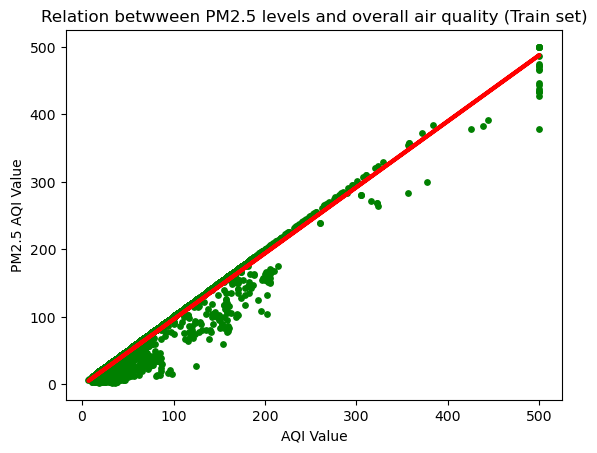

In [53]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Relation betwween PM2.5 levels and overall air quality (Train set)')
plot_test.xlabel('AQI Value')
plot_test.ylabel('PM2.5 AQI Value')
plot_test.show()

In [ ]:
#Comments and thoughts:
#The model was quite accurate, but this is not a challenging comparison: the correlation between overall air quality and PM2.5 particulates in the air are well known. Some caveats as noted above are data points with much lower PM2.5 values and AQI values than the regression line suggests: it would be interestng to look into these cases in more detail: isthere a cause and effect? What oteher factors might be going on here? How might the other data points impact on this?
#There is some bis in the data: 500 is the maximum category represented in the data, and this will pull the estimations of the model down over multiple repetitons, making it less accurate. The absolute straight line of the data points in the middle range of the data set indicates a fixed correlation which mayhave been brought about throught the methodology used in data collection and/